In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [72]:
data = pd.read_csv('desktop/OpenLine.csv')

In [73]:
len(data)

14126

In [74]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True)

In [75]:
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [76]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan

In [77]:
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

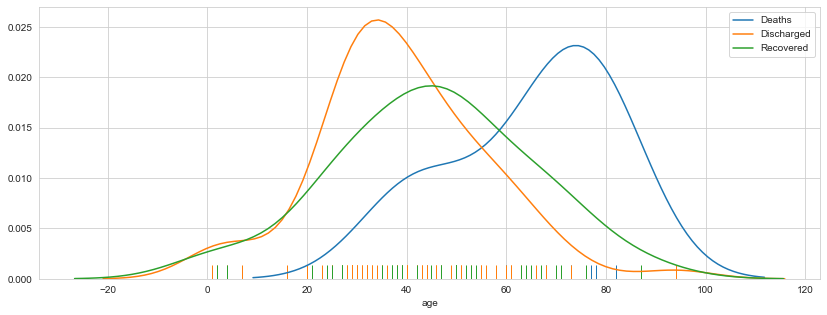

In [78]:
#age distributions of those who died, were discharged, or recovered.
plt.figure(figsize=(14,5))
sns.distplot(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int),hist=False,rug=True,label='Deaths')
sns.distplot(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int),hist=False,rug=True,label='Discharged')
sns.distplot(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int),hist=False,rug=True,label='Recovered')

plt.legend()
plt.show()

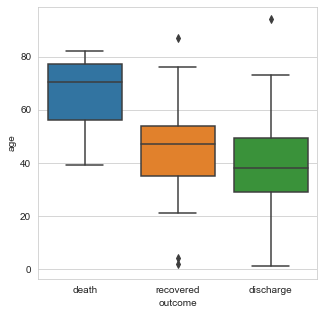

In [79]:
df1 = pd.DataFrame(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df3 = pd.DataFrame(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df2 = pd.DataFrame(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')
cdf = pd.concat([df1, df2, df3])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=cdf)  # RUN PLOT   
plt.show()

In [80]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int) .mean()
#average age of all deaths. To adapt the code for other outcomes, simply substitute ‘death’ with other outcomes.

65.125

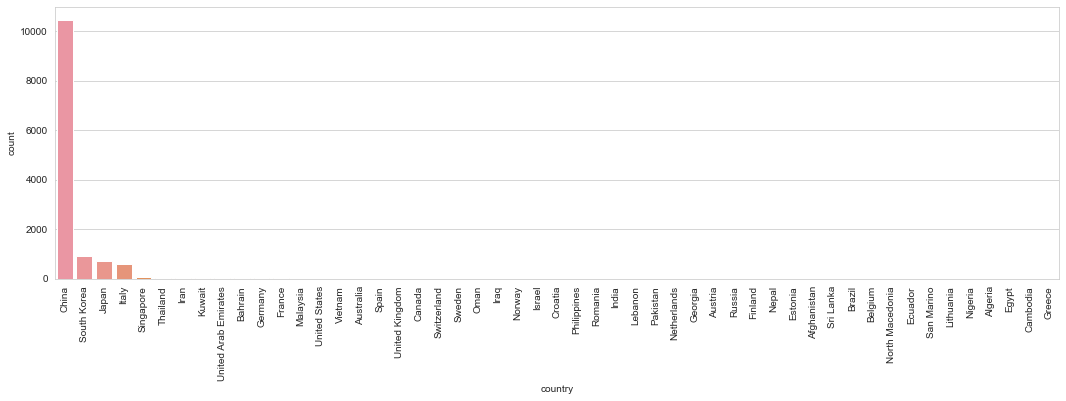

In [81]:
#How many cases are there across countries?
#How does the spread differ among continents?
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

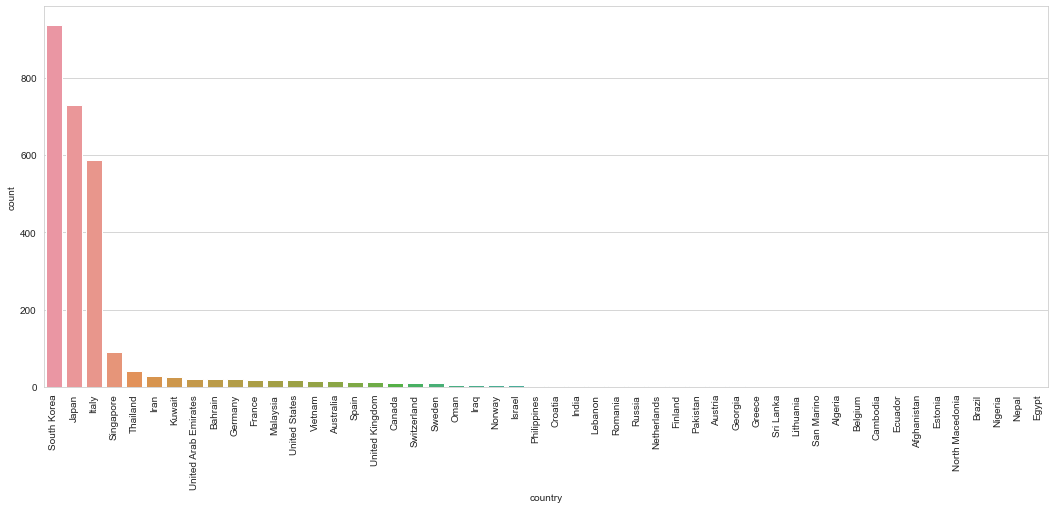

In [82]:
#Same data as above, but without China
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [83]:
data = pd.read_csv('desktop/TimeS.csv')


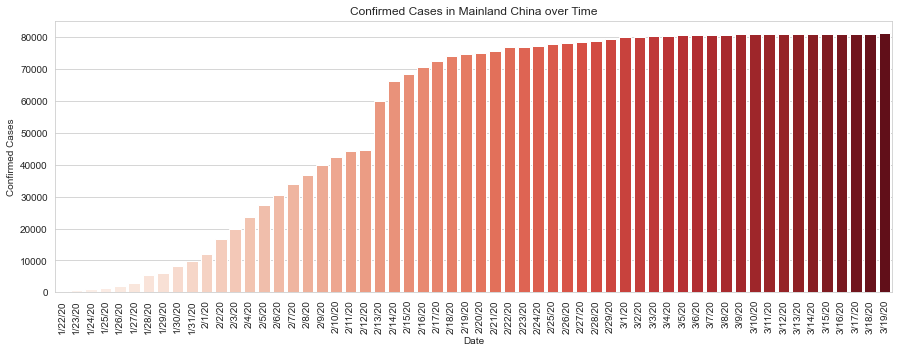

In [88]:
#You can see the cases for ANY country. To do that, just replace the "US" in the line below to the country of your choice.
plot_data = data[data['Country/Region']=='China'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Reds')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

In [92]:
#As you can see above, this is what many cournties that are heavily affected are trying to achieve: To flatten the curve of infection. 

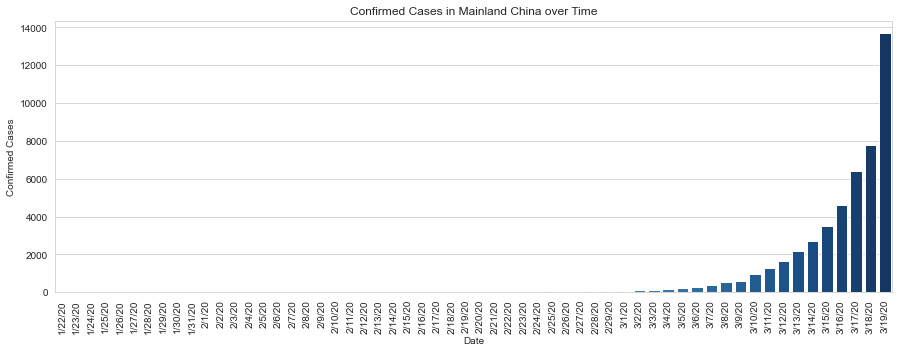

In [89]:
plot_data = data[data['Country/Region']=='US'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

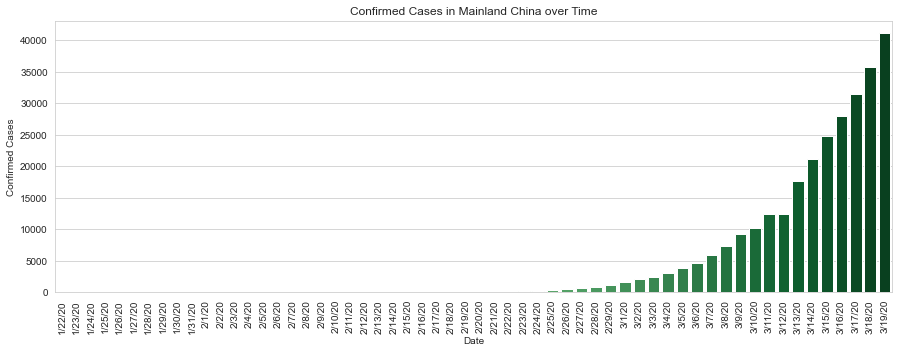

In [91]:
plot_data = data[data['Country/Region']=='Italy'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Greens')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

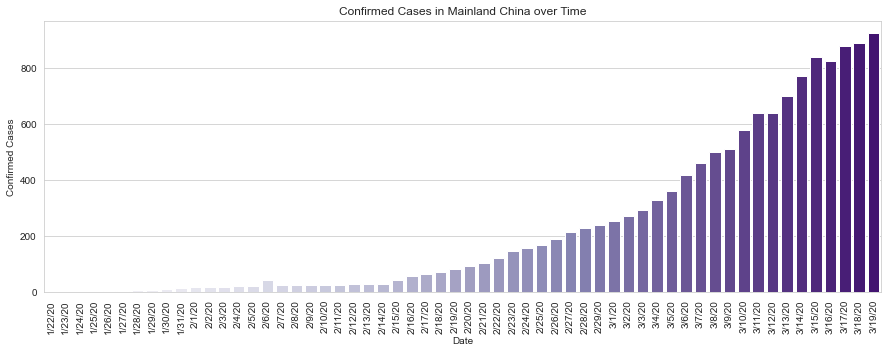

In [93]:
plot_data = data[data['Country/Region']=='Japan'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

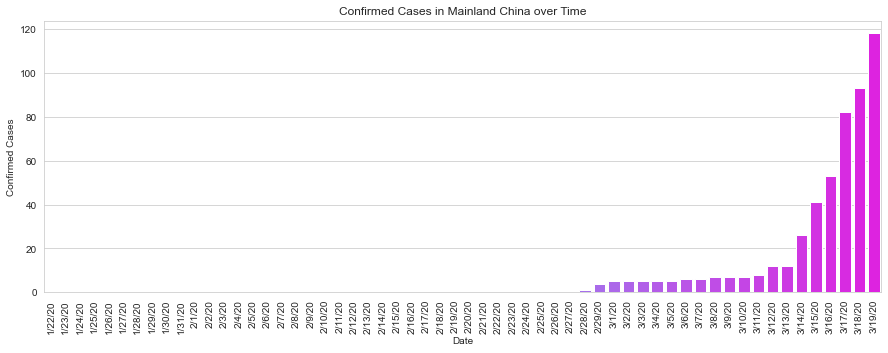

In [99]:
plot_data = data[data['Country/Region']=='Mexico'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='cool')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

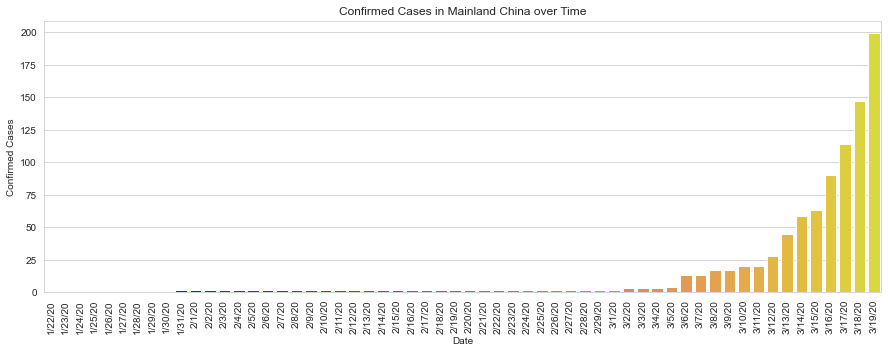

In [100]:
plot_data = data[data['Country/Region']=='Russia'].sum().drop(['Province/State','Country/Region','Lat','Long'])
plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='plasma')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()